In [86]:
from scipy.spatial import Delaunay
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon
import math
from beacon import Beacon


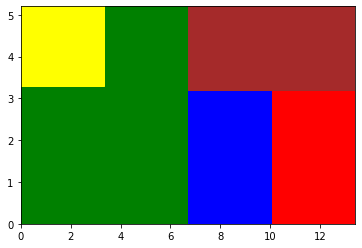

In [87]:
# Criando sala hipotetica para testes de localização

ax = plt.figure().add_subplot(111)
  
area_trabalho = matplotlib.patches.Rectangle((0, 0), 2.75, 3.30,color ='green')
area_trabalho2 = matplotlib.patches.Rectangle((2.75, 0), 3.95, 5.2,color ='green')
copa = matplotlib.patches.Rectangle((0, 3.3), 3.35, 2.7,color ='yellow')
sala_socios = matplotlib.patches.Rectangle((6.7, 0), 3.35, 3.2,color ='blue')
sala_reuniao = matplotlib.patches.Rectangle((10.05, 0), 3.35, 3.2,color ='red')
cafe = matplotlib.patches.Rectangle((6.7, 3.2), 6.7, 2.7,color ='brown')

ax.add_patch(area_trabalho)
ax.add_patch(area_trabalho2)
ax.add_patch(copa)
ax.add_patch(sala_socios)
ax.add_patch(sala_reuniao)
ax.add_patch(cafe)
  
plt.xlim([0, 13.4])
plt.ylim([0, 5.2])
  
plt.show()

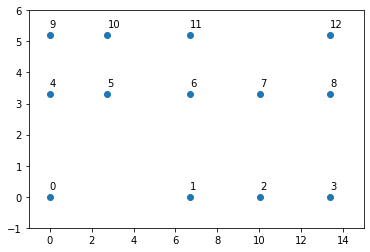

In [88]:
# Definindo vertices chaves para definição de cada sala individualmente

sala_blue = [
    [0,0], [6.7, 0], [10.05, 0], [13.4, 0], 
    [0, 3.3], [2.75, 3.3], [6.7, 3.3], [10.05, 3.3], [13.4, 3.3],
    [0, 5.2], [2.75, 5.2], [6.7, 5.2], [13.4, 5.2]
]
np_sala_blue = np.array(sala_blue)
x_list = np_sala_blue[:,0]
y_list = np_sala_blue[:,1]

plt.clf()
plt.plot(x_list, y_list, 'o')

for i in range(13):
    plt.text(x_list[i], y_list[i]+0.25, str(i))

plt.xlim([-1, 15])
plt.ylim([-1, 6])
plt.show()

In [89]:
def plotar_beacons():
    beacon_1 = [8.375, 3.3]
    plt.plot(beacon_1[0], beacon_1[1], 'ro')
    plt.text(beacon_1[0]+0.2, beacon_1[1]+0.2, '1')

    beacon_2 = [13.4, 4.5]
    plt.plot(beacon_2[0], beacon_2[1], 'ro')
    plt.text(beacon_2[0]-0.5, beacon_2[1], '2')

    beacon_3 = [2.75, 4.5]
    plt.plot(beacon_3[0], beacon_3[1], 'ro')
    plt.text(beacon_3[0]+0.2, beacon_3[1], '3')

    beacon_4 = [0, 1.5]
    plt.plot(beacon_4[0], beacon_4[1], 'ro')
    plt.text(beacon_4[0]+0.2, beacon_4[1], '4')

    beacon_5 = [10.05, 1.5]
    plt.plot(beacon_5[0], beacon_5[1], 'ro')
    plt.text(beacon_5[0]-0.5, beacon_5[1], '5')

plt.show()

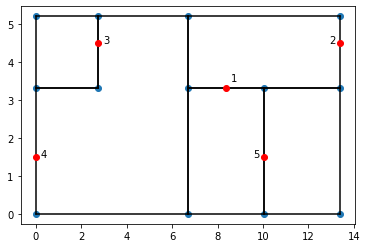

In [90]:
# Conectando os pontos para testar se os pontos chaves representam todos os poligonos

def connectpoints(p1,p2):
    x1, x2 = x_list[p1], x_list[p2]
    y1, y2 = y_list[p1], y_list[p2]
    plt.plot([x1,x2],[y1,y2],'k-')

def connecting(p):
    points = p + [p[0]]
    for p in range(len(points)-1):
        connectpoints(points[p], points[p+1])

# Criando metodo para poder trazer essa figura em outras celulas
def base_fig():
    plt.plot(x_list, y_list, 'o')
    connecting(pontos_cafe)
    connecting(pontos_sala_reuniao)
    connecting(pontos_sala_socios)
    connecting(pontos_copa)
    connecting(pontos_area_trabalho)
    plotar_beacons()

pontos_cafe = [6,11,12,8]
pontos_sala_reuniao = [2,7,8,3]
pontos_sala_socios = [1,6,7,2]
pontos_copa = [4,9,10,5]
pontos_area_trabalho = [0,1,6,11,10,5,4]

base_fig()
plt.savefig('base_fig.png')
plt.show()

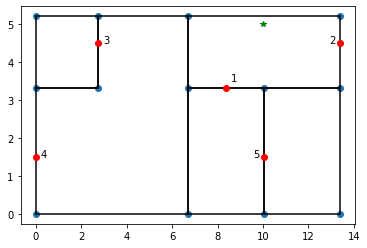

fora de sala_reuniao
fora de copa
dentro de cafe
fora de area_trabalho
fora de sala_socios


In [91]:
# Definindo poligonos para testar em qual cômodo um ponto se encontra 
# ainda sem uso de beacon
base_fig()
polygons = {
    "sala_reuniao": Polygon([sala_blue[i] for i in pontos_sala_reuniao]),
    "copa": Polygon([sala_blue[i] for i in pontos_copa]),
    "cafe": Polygon([sala_blue[i] for i in pontos_cafe]),
    "area_trabalho": Polygon([sala_blue[i] for i in pontos_area_trabalho]),
    "sala_socios": Polygon([sala_blue[i] for i in pontos_sala_socios]),
}
p1 = Point(10,5) 
plt.plot(p1.x, p1.y, 'g*')
plt.show()

# Existem nuancias a serem tratadas aqui, ex: ponto p1 no mesmo local que um ponto chave
for polygon_name, polygon in polygons.items():
    if polygon.contains(p1):
        print(f'dentro de {polygon_name}')
        continue
    print(f'fora de {polygon_name}')


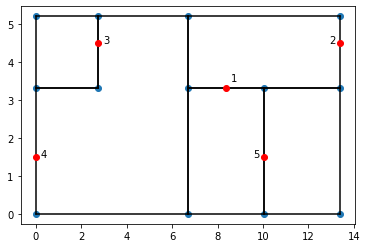

In [92]:
base_fig()

In [93]:
print("DAQUI A BAIXO SÃO TENTATIVAS DE ENCONTRAR O XY DO N")

DAQUI A BAIXO SÃO TENTATIVAS DE ENCONTRAR O XY DO N


In [94]:
PRECISION = 5  # Decimal point precision

class Circle(object):
    """ An OOP implementation of a circle as an object """

    def __init__(self, xposition, yposition, radius):
        self.xpos = xposition
        self.ypos = yposition
        self.radius = radius

    def circle_intersect(self, circle2):
        """
        Intersection points of two circles using the construction of triangles
        as proposed by Paul Bourke, 1997.
        http://paulbourke.net/geometry/circlesphere/
        """
        X1, Y1 = self.xpos, self.ypos
        X2, Y2 = circle2.xpos, circle2.ypos
        R1, R2 = self.radius, circle2.radius

        Dx = X2-X1
        Dy = Y2-Y1
        D = round(math.sqrt(Dx**2 + Dy**2), PRECISION)
        # Distance between circle centres
        if D > R1 + R2:
            return "The circles do not intersect"
        elif D < math.fabs(R2 - R1):
            return "No Intersect - One circle is contained within the other"
        elif D == 0 and R1 == R2:
            return "No Intersect - The circles are equal and coincident"
        else:
            if D == R1 + R2 or D == R1 - R2:
                CASE = "The circles intersect at a single point"
            else:
                CASE = "The circles intersect at two points"
            chorddistance = (R1**2 - R2**2 + D**2)/(2*D)
            # distance from 1st circle's centre to the chord between intersects
            halfchordlength = math.sqrt(R1**2 - chorddistance**2)
            chordmidpointx = X1 + (chorddistance*Dx)/D
            chordmidpointy = Y1 + (chorddistance*Dy)/D
            I1 = (round(chordmidpointx + (halfchordlength*Dy)/D, PRECISION),
                  round(chordmidpointy - (halfchordlength*Dx)/D, PRECISION))
            theta1 = round(math.degrees(math.atan2(I1[1]-Y1, I1[0]-X1)),
                           PRECISION)
            I2 = (round(chordmidpointx - (halfchordlength*Dy)/D, PRECISION),
                  round(chordmidpointy + (halfchordlength*Dx)/D, PRECISION))
            theta2 = round(math.degrees(math.atan2(I2[1]-Y1, I2[0]-X1)),
                           PRECISION)
            if theta2 > theta1:
                I1, I2 = I2, I1
            return (I1, I2, CASE)

In [95]:
# Funcao que valida qual das duas coordenadas é validas
# a partir da distancia do ponto mais distante
def find_fourth_coordinate(p3, circle_intersection, result):
    if math.dist(p3, circle_intersection[0]) == result:
        return circle_intersection[0]
    return circle_intersection[1]

# os 3 pontos simulam os 3 beacons mais proximos
a = [1,2]
b = [2,4]
c = [5,2]

# o objetivo final é encontrar a coordenada de N, 
# aqui será usada uma coordenada ja conhecida para 
# provar que é possivel encontrar elas com esse metodo
n = (4.0,5.0)
an = math.dist(a, n)
bn = math.dist(b, n)
cn = math.dist(c, n)
print('an', an)
print('bn', bn)
print('cn', cn)

sorted_distances = sorted([(a, an), (b, bn), (c, cn)], key=lambda x : x[1])
print(sorted_distances)

p1, r1 = sorted_distances[0]
p2, r2 = sorted_distances[1]
p3, r3 = sorted_distances[2]

circle_p1 = Circle(p1[0], p1[1], r1)
circle_p2 = Circle(p2[0], p2[1], r2)

p4 = find_fourth_coordinate(p3, circle_p1.circle_intersect(circle_p2), r3) 
print(f"p4 = {p4}\nn = {n}")
print(p4 == n)

an 4.242640687119286
bn 2.23606797749979
cn 3.1622776601683795
[([2, 4], 2.23606797749979), ([5, 2], 3.1622776601683795), ([1, 2], 4.242640687119286)]
p4 = (4.0, 5.0)
n = (4.0, 5.0)
True
